# Dataset used: Iris

In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
iris = pd.read_csv('iris.data', names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [102]:
from sklearn.pipeline import Pipeline
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
#sns.pairplot(x)
plt.show()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# KNClassifier

In [74]:
pipe = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.25,
                                                   shuffle = True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [81]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )


0.9736842105263158
0.97


In [110]:
def knn_test(k, x_train, y_train, x_test, y_test, weight_type, metric_type):
    pipe.set_params(KNN__n_neighbors = k, KNN__metric = metric_type, KNN__weights = weight_type)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    return "{:.2f}".format(f1_score(y_test, y_pred, average='macro')) 

0.97


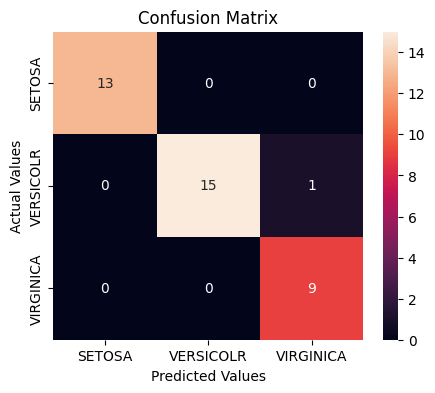

In [107]:
pipe.set_params(KNN__n_neighbors = 5)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [90]:
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

# K-fold - Iris

In [103]:
def K_fold_test(k,x,y):
    cross_val = KFold(k, shuffle=True, random_state=1)
    fold_count = 1
    cm_list = []

    for train, validation in cross_val.split(x):
        print("============================================================")
        print("Fold-{}".format(fold_count))
        print("------------------------------------------------------------")

        X_train_k, y_train_k = x.iloc[train], y.iloc[train]
        X_val_k, y_val_k = x.iloc[validation], y.iloc[validation]
        pipe.fit(X_train_k, y_train_k)
        y_predict = pipe.predict(X_val_k)

        accuracy = accuracy_score(y_val_k, y_predict)
        accuracy = accuracy * 100
        f1 = f1_score(y_val_k, y_predict, average='macro')
        f1 = f1 * 100
        print("Accuracy for Fold-{} was {}%".format(fold_count, accuracy))
        print("F1-macro for Fold-{} was {:.2f}%".format(fold_count, f1))
        print("F1-macro without k-fold, previous step = {:.2f}%".format(f1_score(y_test, y_pred, average='macro')*100))
        fold_count = fold_count + 1
        print("____________________________________________________________")


In [104]:
print("K = 2\n")
K_fold_test(2, x,y)
print("------------")
print("K = 5\n")
K_fold_test(5, x,y)
print("------------")
print("K = 10\n")
K_fold_test(10,x,y)

K = 2

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 94.66666666666667%
F1-macro for Fold-1 was 94.75%
F1-macro without k-fold, previous step = 97.17%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 97.33333333333334%
F1-macro for Fold-2 was 97.27%
F1-macro without k-fold, previous step = 97.17%
____________________________________________________________
------------
K = 5

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 96.66666666666667%
F1-macro for Fold-1 was 96.10%
F1-macro without k-fold, previous step = 97.17%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 96.66666666666667%
F1-macro for Fold-2 was 96.80%
F1-macro without k-fold, previous step = 97.17%
______________________________

# Testing different k-values


In [111]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'uniform','minkowski'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
df

,K,F1
2,3,0.97
3,4,0.97
4,5,0.97
5,6,0.97
6,7,0.97
7,8,0.97
8,9,0.97
9,10,0.97
10,11,0.97
11,12,0.97


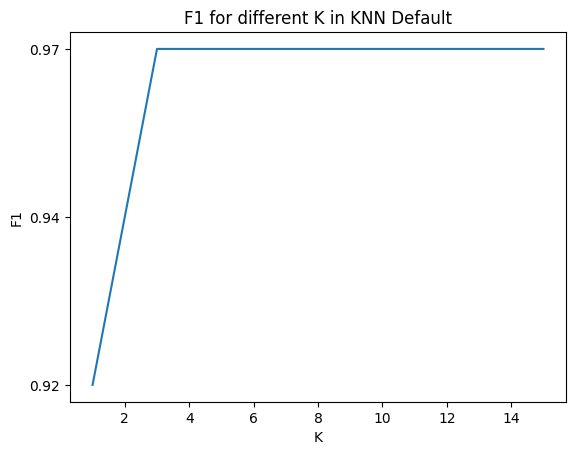

In [112]:
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN Default')
plt.show()

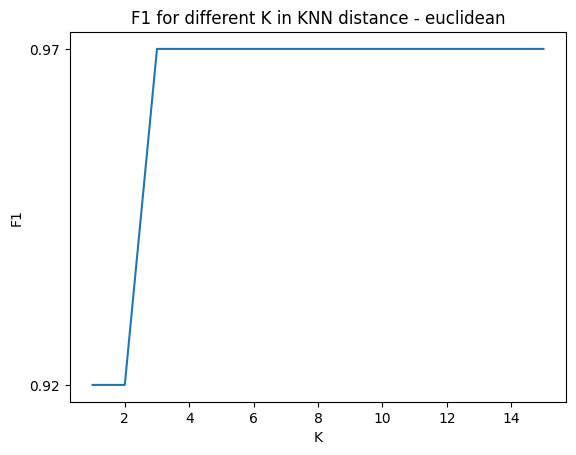

In [113]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','euclidean'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(f1_scores, k_list)),columns = ['F1', 'K'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x='K', y='F1').set(title='F1 for different K in KNN distance - euclidean')
plt.show()


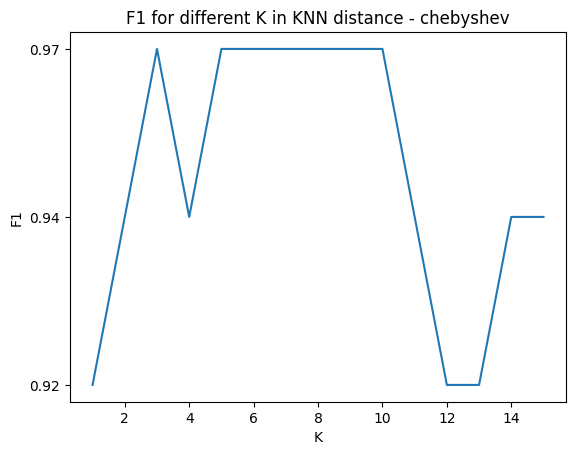

In [114]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','chebyshev'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(f1_scores, k_list)),columns = ['F1', 'K'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x='K', y='F1').set(title='F1 for different K in KNN distance - chebyshev')
plt.show()

# Wine Dataset

In [115]:
wine = pd.read_csv('wine.data', names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash",
                                       "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                        "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                       "Proline"])
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [116]:
x = wine.iloc[:, 1:]
y = wine.iloc[:, 0]
plt.show()

In [117]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size = 0.25,
                                                   shuffle = True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [118]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )

0.93


0.95


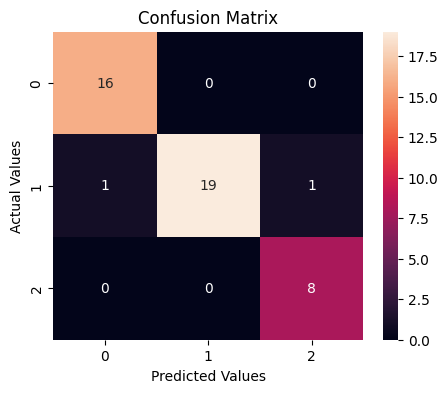

array([[16,  0,  0],
       [ 1, 19,  1],
       [ 0,  0,  8]], dtype=int64)

In [120]:
pipe.set_params(KNN__n_neighbors = 5)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
cm

Testy K-foldów dla WINE

In [121]:
print("K = 2\n")
K_fold_test(2, x,y)
print("------------")
print("K = 5\n")
K_fold_test(5, x,y)
print("------------")
print("K = 10\n")
K_fold_test(10,x,y)

K = 2

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 91.01123595505618%
F1-macro for Fold-1 was 91.22%
F1-macro without k-fold, previous step = 95.36%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 91.01123595505618%
F1-macro for Fold-2 was 91.23%
F1-macro without k-fold, previous step = 95.36%
____________________________________________________________
------------
K = 5

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 94.44444444444444%
F1-macro for Fold-1 was 94.33%
F1-macro without k-fold, previous step = 95.36%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 94.44444444444444%
F1-macro for Fold-2 was 95.21%
F1-macro without k-fold, previous step = 95.36%
______________________________

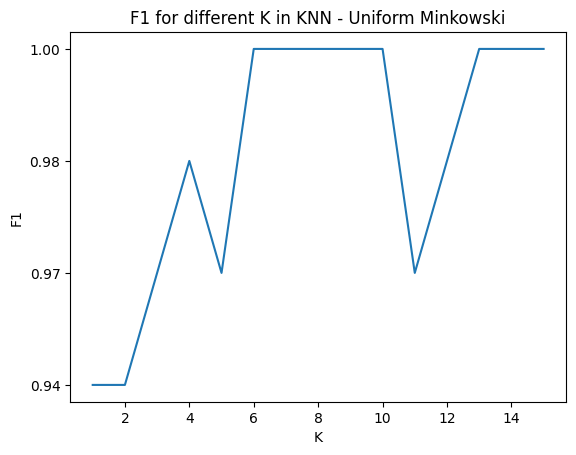

In [122]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'uniform','minkowski'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN - Uniform Minkowski')
plt.show()

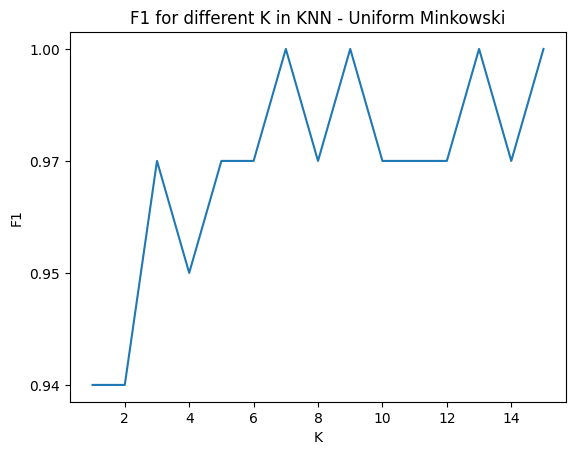

In [123]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','minkowski'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN - Uniform Minkowski')
plt.show()

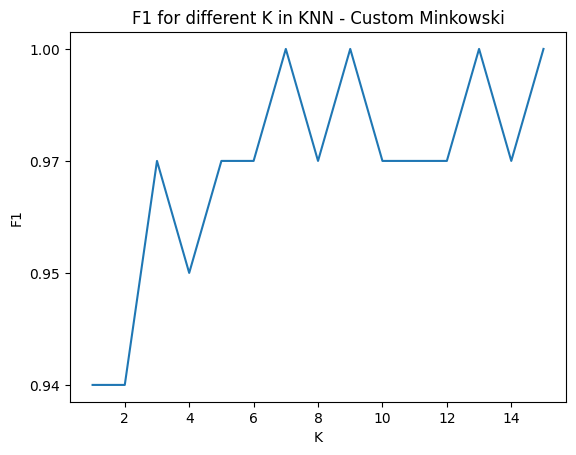

In [125]:
def custom_weights(distances):
    return 1 / (distances ** 2)
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,custom_weights,'minkowski'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN - Custom Minkowski')
plt.show()

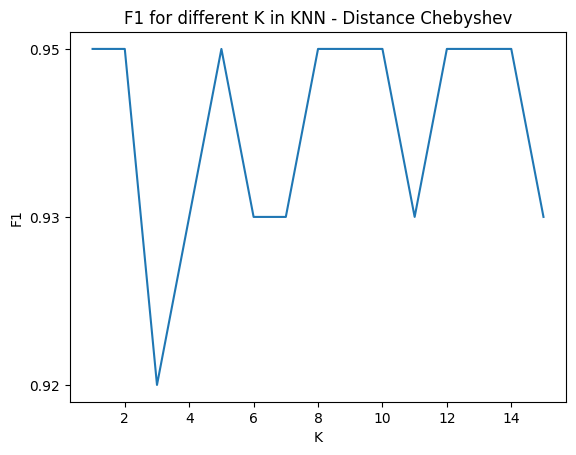

In [126]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','chebyshev'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN - Distance Chebyshev')
plt.show()

# Polish companies bankruptcy

In [175]:
from scipy.io import arff
from sklearn.preprocessing import MultiLabelBinarizer

data = arff.loadarff('2year.arff')
bank_df = pd.DataFrame(data[0])
#df['Attr6'].value_counts(dropna=False)
bank_df
bank_df.isna().sum()
bank_df = bank_df.drop(columns=['Attr37', 'Attr21'])
bank_df = bank_df.fillna(bank_df.median())
# simple imputer

In [178]:
percent_missing = bank_df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': bank_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

bank_df.head(20)


       column_name  percent_missing
Attr1        Attr1              0.0
Attr50      Attr50              0.0
Attr36      Attr36              0.0
Attr38      Attr38              0.0
Attr39      Attr39              0.0
...            ...              ...
Attr28      Attr28              0.0
Attr29      Attr29              0.0
Attr30      Attr30              0.0
Attr31      Attr31              0.0
class        class              0.0

[63 rows x 2 columns]


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.51710,-14.547,0.510690,0.253660,0.91816,1.15190,0.42695,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.7400,3.38790,5.34400,b'0'
1,0.030073,0.59563,0.186680,1.33820,-37.859,-0.000319,0.041670,0.67890,0.32356,0.40437,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.6600,0.58619,1.23810,b'0'
2,0.257860,0.29949,0.665190,3.22110,71.799,0.000000,0.318770,2.33200,1.67620,0.69841,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.2150,5.59690,47.46600,b'0'
3,0.227160,0.67850,0.042784,1.08280,-88.212,0.000000,0.285050,0.47384,1.32410,0.32150,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.4600,2.56210,3.00660,b'0'
4,0.085443,0.38039,0.359230,1.94440,21.731,0.187900,0.108230,1.37140,1.11260,0.52167,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.0580,4.09840,5.98740,b'0'
5,0.287840,0.55225,0.316340,1.70330,38.803,0.390120,0.287840,0.80761,1.29200,0.44600,...,0.225990,0.645370,0.77401,0.229690,7.8151,3.15340,110.8300,3.29330,6.33460,b'0'
6,0.153820,0.47248,0.311790,1.68980,-71.985,0.000000,0.190810,1.11650,1.50460,0.52752,...,0.142170,0.291600,0.87368,0.030421,2.6734,7.80930,109.6400,3.32910,6.36920,b'0'
7,0.262520,0.45834,0.417040,1.94060,47.511,0.000000,0.262520,1.18180,2.18540,0.54166,...,0.625180,0.484660,0.38590,0.000000,7.7696,4.57600,74.0550,4.92880,15.65800,b'0'
8,0.079147,0.02240,0.897050,283.12000,139.750,0.000000,0.097916,43.64300,0.61657,0.97760,...,0.168460,0.080961,0.86061,0.014807,14.2180,79.20300,1.8823,193.91000,6.17980,b'0'
9,0.009901,0.71174,0.065186,1.14850,-62.297,0.000000,0.013459,0.40500,1.17380,0.28826,...,0.203090,0.034347,0.83056,0.720470,7.7605,4.12530,136.5400,2.67320,2.36800,b'0'


In [180]:
x = bank_df.iloc[:, :-1]
y = bank_df.iloc[:, -1]
print(y)
print(type(y))
y = MultiLabelBinarizer().fit_transform(y)
y = y[: , 1]
y = pd.Series(y) 
y
print(type(y))

0        b'0'
1        b'0'
2        b'0'
3        b'0'
4        b'0'
         ... 
10168    b'1'
10169    b'1'
10170    b'1'
10171    b'1'
10172    b'1'
Name: class, Length: 10173, dtype: object
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.25,
                                                   shuffle = True, #shuffle the data to avoid bias
                                                   random_state= 0)


In [182]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )

0.49


0.49


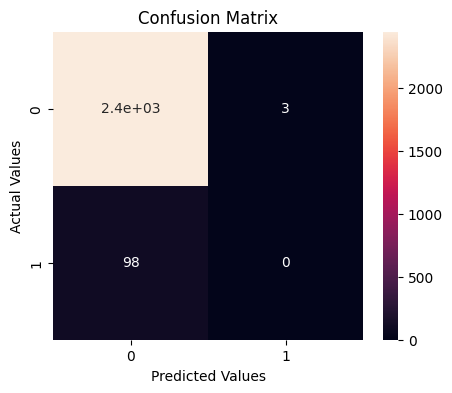

array([[2443,    3],
       [  98,    0]], dtype=int64)

In [183]:
pipe.set_params(KNN__n_neighbors = 5)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("{:.2f}".format(f1_score(y_test, y_pred, average='macro')) )
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
cm
# precision per klassa dla 1

In [184]:
print("K = 2\n")
K_fold_test(2, x,y)
print("------------")
print("K = 5\n")
K_fold_test(5, x,y)
print("------------")
print("K = 10\n")
K_fold_test(10,x,y)

K = 2

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 96.18635738156084%
F1-macro for Fold-1 was 49.03%
F1-macro without k-fold, previous step = 48.99%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 95.81203303185214%
F1-macro for Fold-2 was 49.40%
F1-macro without k-fold, previous step = 48.99%
____________________________________________________________
------------
K = 5

Fold-1
------------------------------------------------------------
Accuracy for Fold-1 was 96.06879606879608%
F1-macro for Fold-1 was 49.00%
F1-macro without k-fold, previous step = 48.99%
____________________________________________________________
Fold-2
------------------------------------------------------------
Accuracy for Fold-2 was 95.87223587223586%
F1-macro for Fold-2 was 48.95%
F1-macro without k-fold, previous step = 48.99%
______________________________

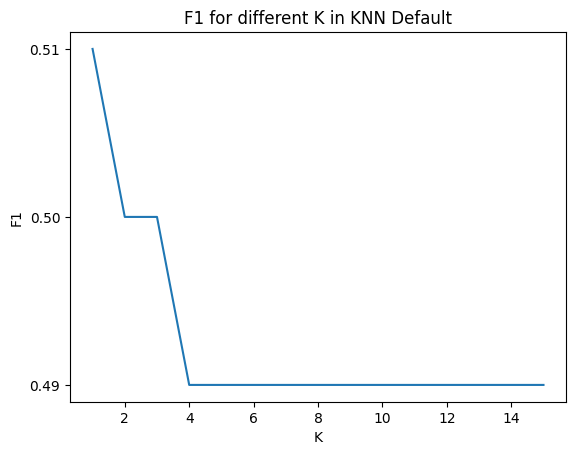

In [186]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'uniform','minkowski'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(k_list,f1_scores)),columns = ['K', 'F1'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x ='K', y ='F1').set(title='F1 for different K in KNN Default')
plt.show()

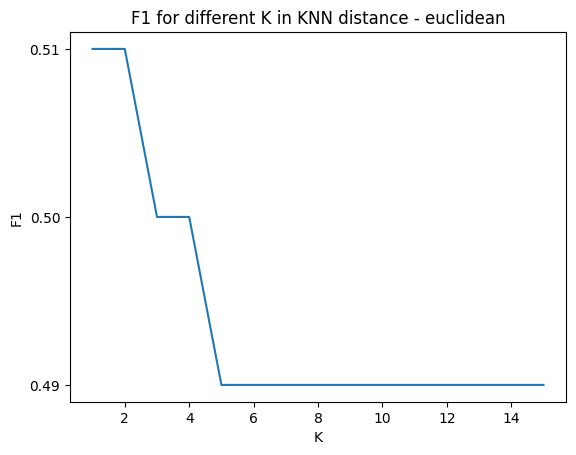

In [187]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','euclidean'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(f1_scores, k_list)),columns = ['F1', 'K'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x='K', y='F1').set(title='F1 for different K in KNN distance - euclidean')
plt.show()


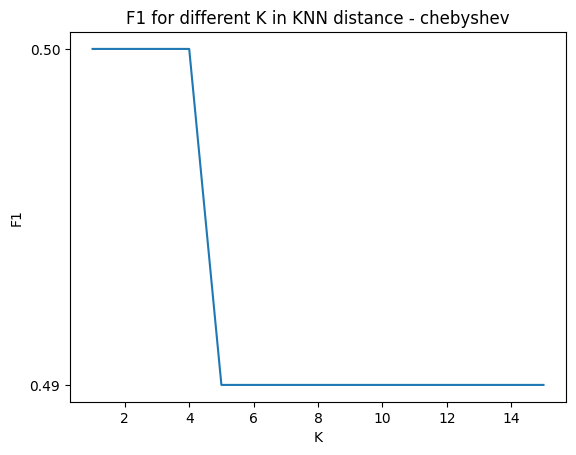

In [188]:
f1_scores = []
for i in range(1,16):
    f1_scores.append(knn_test(i,x_train,y_train,x_test,y_test,'distance','chebyshev'))
k_list = list(range(1, len(f1_scores)+1))
df = pd.DataFrame(list(zip(f1_scores, k_list)),columns = ['F1', 'K'])
df.sort_values('F1', ascending=False, inplace=True)
sns.lineplot(data=df, x='K', y='F1').set(title='F1 for different K in KNN distance - chebyshev')
plt.show()